# Copyright
<pre>
Jelen forráskód a Budapesti Műszaki és Gazdaságtudományi Egyetemen tartott
"Deep Learning a gyakorlatban Python és LUA alapon" tantárgy segédanyagaként készült.

A tantárgy honlapja: http://smartlab.tmit.bme.hu/oktatas-deep-learning
Deep Learning kutatás: http://smartlab.tmit.bme.hu/deep-learning

A forráskódot GPLv3 licensz védi. Újrafelhasználás esetén lehetőség szerint kérjük
az alábbi szerzőt értesíteni.

2019 (c) Csapó Tamás Gábor (csapot kukac tmit pont bme pont hu),
Gyires-Tóth Bálint, Zainkó Csaba


Original Convolutional AutoEncoder example from:

Links:
    [MNIST Dataset] http://yann.lecun.com/exdb/mnist/
    [Keras Convolutional AutoEncoder] https://blog.keras.io/building-autoencoders-in-keras.html
</pre>

In [0]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model



In [0]:
# MNIST mérete: 28x28
input_img = Input(shape=(28,28,1))

In [26]:
# encoder rész
x = Convolution2D(16, (3,3), activation='relu', padding='same')(input_img) # padding=same -> a kimeneti kép ugyanakkora legyen, mint a bemenet
x = MaxPooling2D((2,2), padding='same')(x)
x = Convolution2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Convolution2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# modell az encoder-re
encoder = Model(inputs = input_img, outputs = encoded)

# itt (4 x 4 x 8) azaz 128-dimenziós reprezentáció

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 8)           0         
Total para

In [0]:
# decoder rész
x = Convolution2D(8, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Convolution2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Convolution2D(16, (3,3), activation='relu')(x) # itt nincs padding, hogy 28x28 legyen a kimenet
x = UpSampling2D((2,2))(x)
decoded = Convolution2D(1, (3,3), activation='sigmoid', padding='same')(x)


In [28]:
# modell a teljes AE-re
autoencoder = Model(inputs = input_img, outputs = decoded)

autoencoder.summary()

autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 8)           0         
__________

In [29]:
# tanítóadatok
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _) ,(x_test, _) = mnist.load_data()

print(x_train.shape, x_test.shape)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# azért kell 4D-re átalakítani, mert a Convolution2D bemenete: (samples, rows, cols, channels)
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [30]:
# tanítás
autoencoder.fit(x_train, x_train,
                epochs = 10,
                batch_size = 128,
                shuffle = True,
                validation_data = (x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.2176 - val_loss: 0.1650
Epoch 2/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1596 - val_loss: 0.1535
Epoch 3/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.1445 - val_loss: 0.1373
Epoch 4/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.1360 - val_loss: 0.1298
Epoch 5/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.1306 - val_loss: 0.1317
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.1259 - val_loss: 0.1274
Epoch 7/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.1237 - val_loss: 0.1215
Epoch 8/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.1216 - val_loss: 0.1192
Epoch 9/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.1198 - val_loss: 0.

In [0]:
# néhány digiten encode és decode
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

In [33]:
# milyen méretű a háló közepe, a 'bottleneck'?
print(encoded_imgs.shape)

(10000, 4, 4, 8)


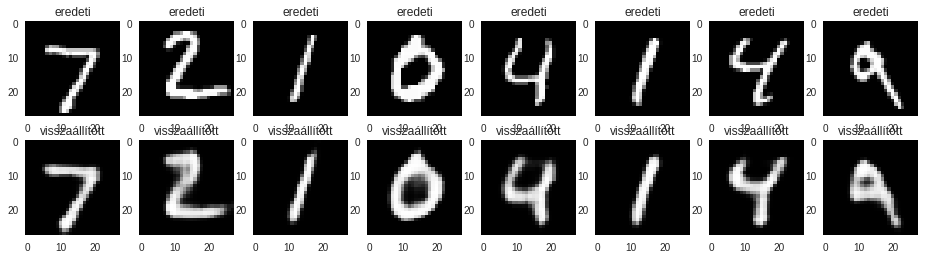

In [46]:
# eredeti és visszaállított képek kirajzolása
n = 8
plt.figure(figsize=(16, 4))
for i in range(n):
  # eredeti
  ax = plt.subplot(2, n, i + 1)
  ax.set_title('eredeti')
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.grid('False')
  
  # visszaállított
  ax = plt.subplot(2, n, i + 1 + n)
  ax.set_title('visszaállított')
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()  
  ax.grid('False')
plt.show()

In [49]:
print(encoded_imgs[i].shape)

(4, 4, 8)


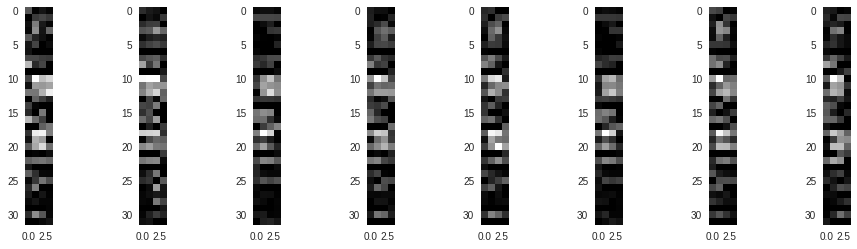

In [51]:
# encoder utáni eredmény, bottleneck reprezentáció
n = 8
plt.figure(figsize=(16, 4))
for i in range(n):
  # eredeti
  ax = plt.subplot(1, n, i + 1)
  plt.imshow(encoded_imgs[i].reshape(4, 4*8).T)
  plt.gray()
  ax.grid('False')